<a href="https://colab.research.google.com/github/Ankit7557/MLnow_2.0/blob/main/03_LinearRegression/3.1_Univariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Students Performance in Exams](https://www.kaggle.com/spscientist/students-performance-in-exams)

**Date Created**: 9th June , 2021

Topic: Univariate Linear Regression

**Author**:
 Ankit Prajapati

 **Reach out**:
[Email](mailto:ankitramprajapati.7@gmail.com) | [GitHub](https://github.com/Ankit7557) | [LinkedIn](https://www.linkedin.com/in/ankit-prajapati-899a66184/)

[[Assessment Repository](https://github.com/Ankit7557/MLnow_2.0)]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/ML/eda_02/student_performance'


/content/drive/MyDrive/ML/eda_02/student_performance


In [ ]:
ls

cleanStudentData.csv  StudentsPerformance.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
import os

In [ ]:
studData=pd.read_csv('StudentsPerformance.csv')

In [ ]:
studData.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##Data Processing


Categorical to numeric value conversion

In [ ]:
categorical_column=[col for col in studData.columns if studData[col].dtype=='object']
print(categorical_column)  

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [ ]:
for col in categorical_column:
  print('{} has {} valies'.format(col,studData[col].unique()))

gender has ['female' 'male'] valies
race/ethnicity has ['group B' 'group C' 'group A' 'group D' 'group E'] valies
parental level of education has ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] valies
lunch has ['standard' 'free/reduced'] valies
test preparation course has ['none' 'completed'] valies


In [ ]:
#convert the categories into numbers 

#binary valued
studData['gender']=studData['gender'].apply({'female':1,'male':2}.get)
studData['test preparation course']=studData['test preparation course'].apply({'none':1,'completed':2}.get)

#multi-valued
studData['parental level of education']=studData['parental level of education'].apply({ "master's degree":1 ,"bachelor's degree":2,"associate's degree":3,'some college':4,
 'high school':5, 'some high school':6}.get)

In [ ]:
studData.drop(['race/ethnicity','lunch'],axis='columns',inplace=True)

In [ ]:
studData.head()

,gender,parental level of education,test preparation course,math score,reading score,writing score
0,1,2,1,72,72,74
1,1,4,2,69,90,88
2,1,1,1,90,95,93
3,2,3,1,47,57,44
4,2,4,1,76,78,75


In [ ]:
studData.to_csv('cleanStudentData.csv')

In [ ]:
ls

cleanStudentData.csv  StudentsPerformance.csv


## Data Visualization

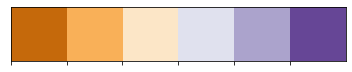

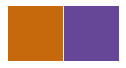

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr'))
pal=sns.color_palette('PuOr',6)
pal.as_hex()

plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697']
sns.set_palette(sns_colors)
sns.palplot(sns.color_palette(sns_colors))

In [ ]:
studData.columns

Index(['gender', 'parental level of education', 'test preparation course',
       'math score', 'reading score', 'writing score'],
      dtype='object')

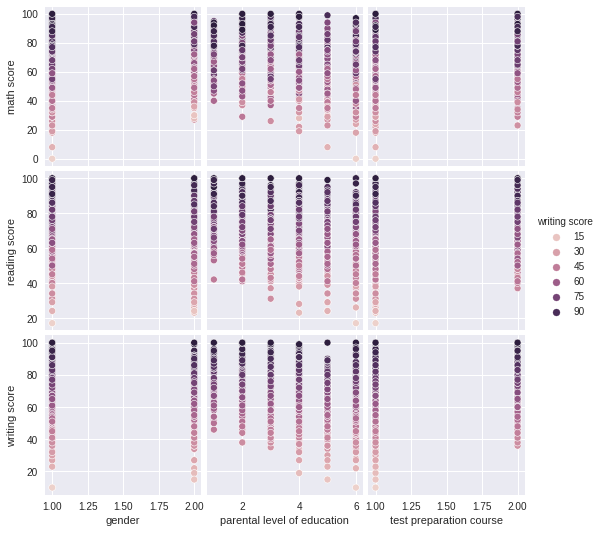

In [ ]:
sns.pairplot(studData,
             x_vars=['gender', 'parental level of education', 'test preparation course'],
              y_vars=['math score', 'reading score', 'writing score'],
                diag_kind='auto',hue='writing score')

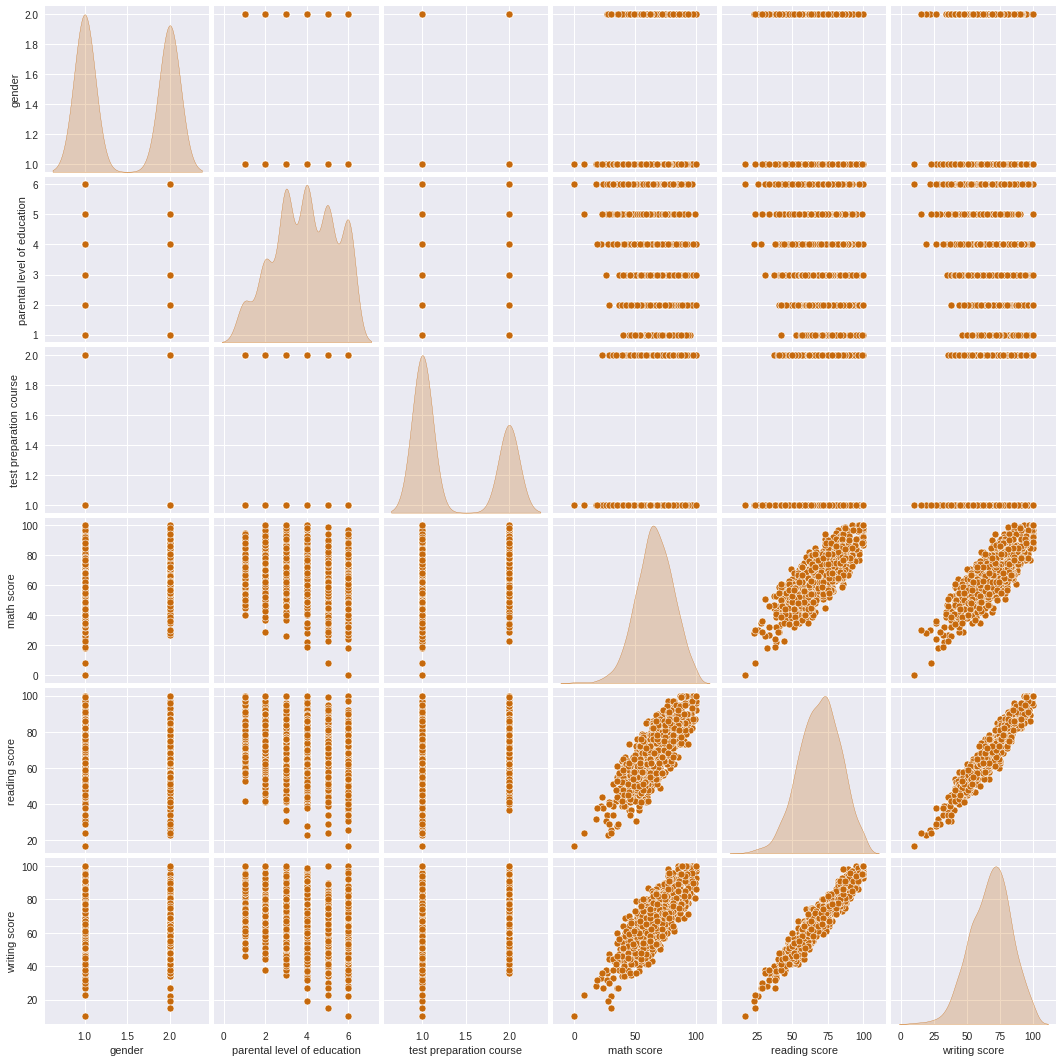

In [ ]:
sns.pairplot(studData,
             x_vars=['gender', 'parental level of education', 'test preparation course','math score', 'reading score', 'writing score'],
              y_vars=['gender', 'parental level of education', 'test preparation course','math score', 'reading score', 'writing score'],
                diag_kind='kde')

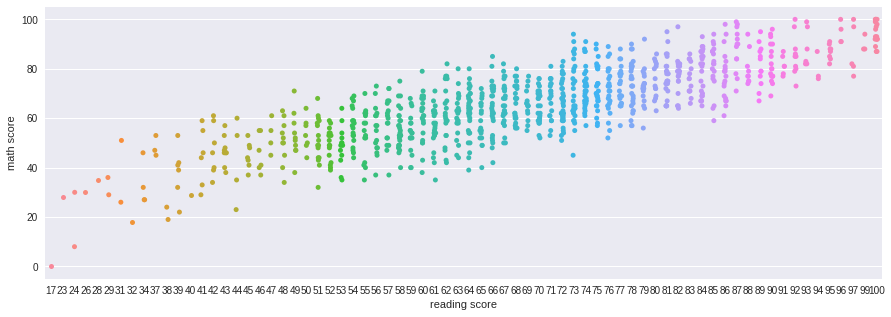

In [ ]:
fig = plt.subplots(figsize=(15,5))
sns.stripplot(x='reading score',y='math score',data=studData)

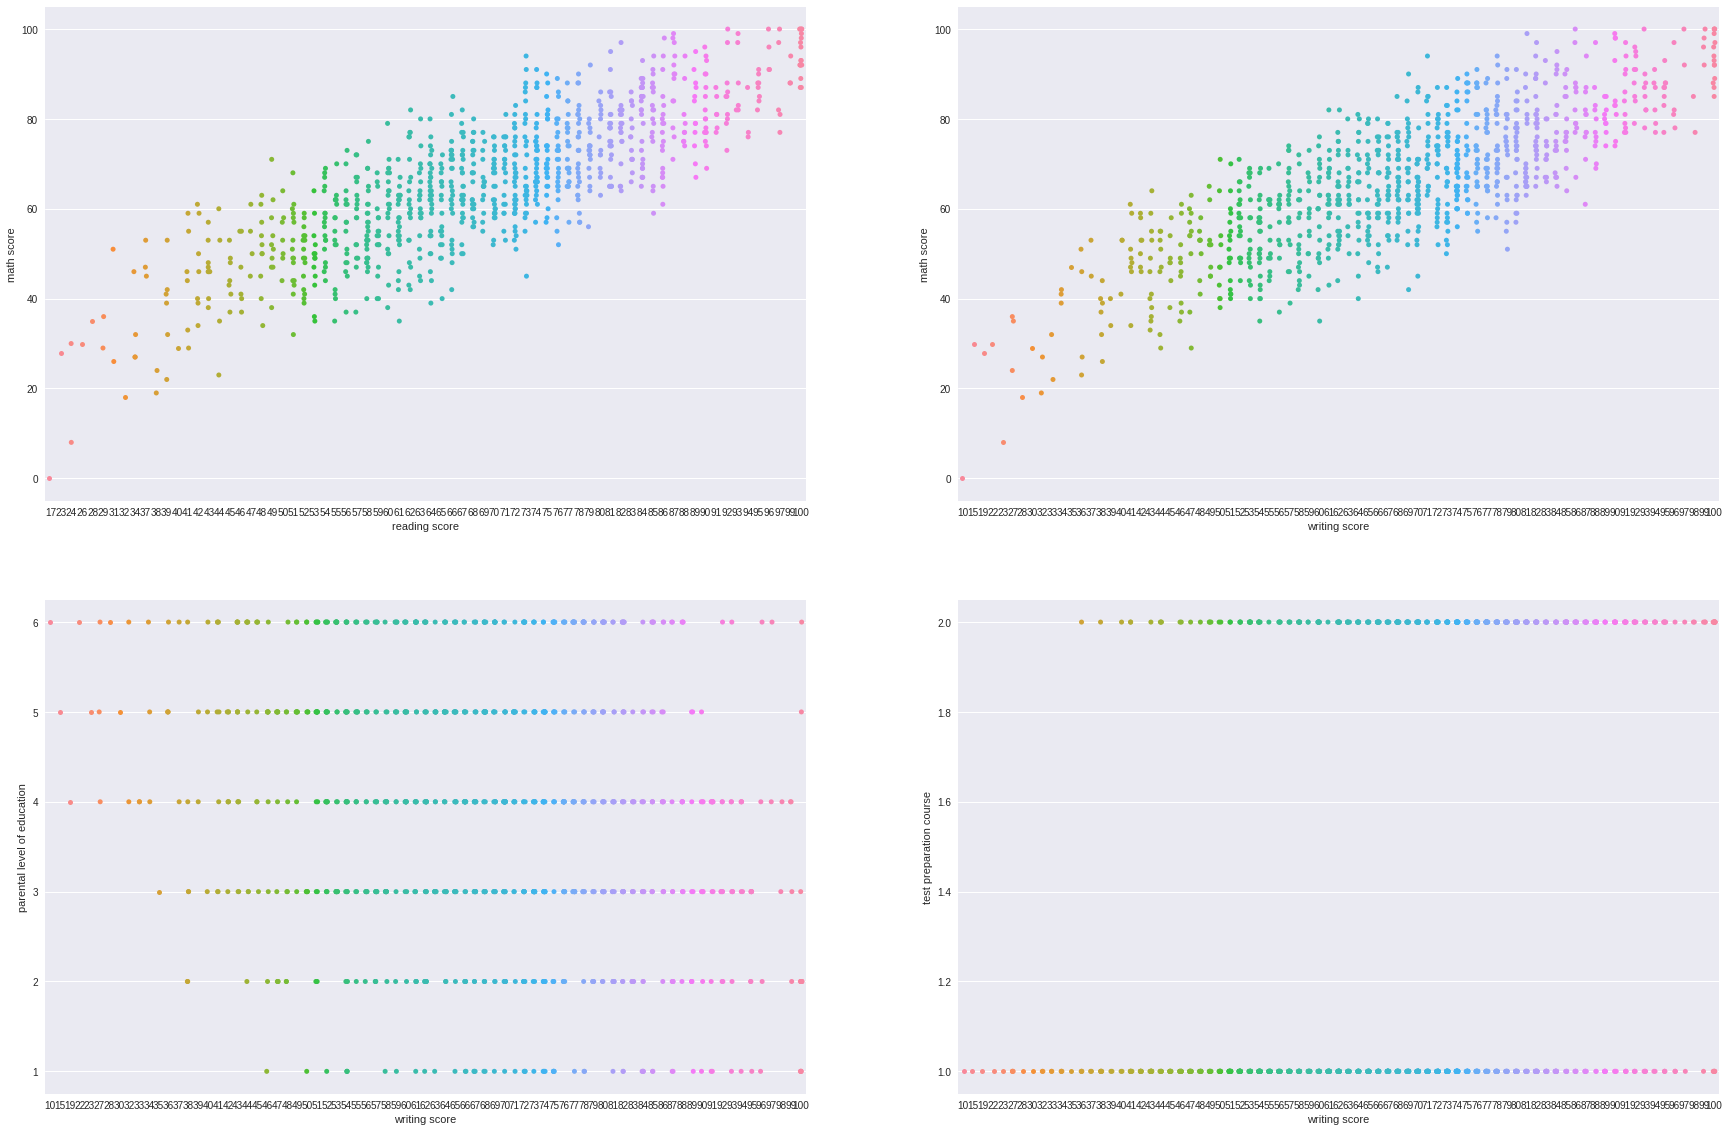

In [ ]:
'parental level of education', 'test preparation course','math score', 'reading score', 'writing score'

fig, axarr = plt.subplots(2,2, figsize=(30,20))

sns.stripplot(y='math score', x='reading score', data=studData, hue=None, ax=axarr[0][0])
sns.stripplot(y='math score', x='writing score', data=studData, hue=None, ax=axarr[0][1])
sns.stripplot(y='parental level of education', x='writing score', data=studData, hue=None, ax=axarr[1][0])
sns.stripplot(y='test preparation course', x='writing score', data=studData, hue=None,  ax=axarr[1][1])


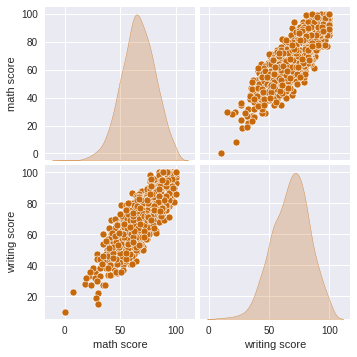

In [ ]:
sns.pairplot(studData,
             x_vars=['math score','writing score'],
             y_vars=['math score', 'writing score'],
          diag_kind='kde')

## Data Split

In [ ]:
uniStudData=studData[['math score','writing score']]
uniStudData.columns

Index(['math score', 'writing score'], dtype='object')

In [ ]:
uniStudData.head()

,math score,writing score
0,72,74
1,69,88
2,90,93
3,47,44
4,76,75


In [ ]:
#75-25 train-test percent split
trainData=uniStudData.sample(frac=0.75,random_state=8)
testData=uniStudData.drop(trainData.index)
print(trainData.head())
print(testData.head())

     math score  writing score
908          67             72
265          59             41
627          61             46
327          28             19
244          75             69
    math score  writing score
2           90             93
6           88             92
7           40             39
9           38             50
10          58             52


In [ ]:
print(trainData.shape)
print(testData.shape)

(750, 2)
(250, 2)


In [ ]:
trainFeatures = trainData.copy()
testFeatures = testData.copy()

print(trainFeatures.head())
print(testFeatures.head())

     math score  writing score
908          67             72
265          59             41
627          61             46
327          28             19
244          75             69
    math score  writing score
2           90             93
6           88             92
7           40             39
9           38             50
10          58             52


In [ ]:
trainLabels=trainFeatures.pop('writing score')
testLabels=testFeatures.pop('writing score')

print(trainLabels.head())
print(testLabels.head())

908    72
265    41
627    46
327    19
244    69
Name: writing score, dtype: int64
2     93
6     92
7     39
9     50
10    52
Name: writing score, dtype: int64


In [ ]:
print(trainFeatures.head())
print(testFeatures.head())

     math score
908          67
265          59
627          61
327          28
244          75
    math score
2           90
6           88
7           40
9           38
10          58


In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(
    loss='mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['mae','mse']
)

In [ ]:
numEpochs=10000
history=model.fit(x = trainFeatures ,y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
24/24 [==============================] - 0s 5ms/step - loss: 7.6541 - mae: 7.6541 - mse: 84.6299 - val_loss: 7.1640 - val_mae: 7.1640 - val_mse: 74.6562
Epoch 7502/10000
24/24 [==============================] - 0s 4ms/step - loss: 7.6542 - mae: 7.6542 - mse: 84.5951 - val_loss: 7.1679 - val_mae: 7.1679 - val_mse: 74.6781
Epoch 7503/10000
24/24 [==============================] - 0s 4ms/step - loss: 7.6544 - mae: 7.6544 - mse: 84.6213 - val_loss: 7.1624 - val_mae: 7.1624 - val_mse: 74.6497
Epoch 7504/10000
24/24 [==============================] - 0s 4ms/step - loss: 7.6574 - mae: 7.6574 - mse: 84.6710 - val_loss: 7.1684 - val_mae: 7.1684 - val_mse: 74.6812
Epoch 7505/10000
24/24 [==============================] - 0s 3ms/step - loss: 7.6543 - mae: 7.6543 - mse: 84.6803 - val_loss: 7.1546 - val_mae: 7.1546 - val_mse: 74.6381
Epoch 7506/10000
24/24 [==============================] - 0s 3ms/step - loss: 7.6539 - mae: 7.6539 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tempListforPreds=[1,2,3,4,5]

print(model.predict(tempListforPreds))

[[16.278753]
 [17.076942]
 [17.875134]
 [18.673325]
 [19.471514]]


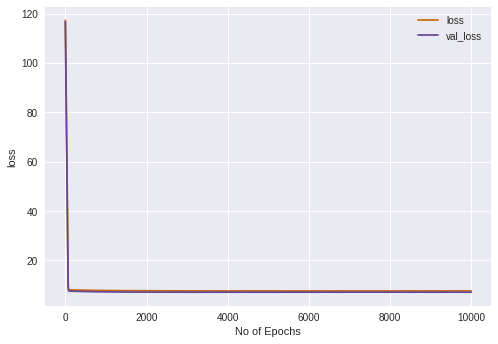

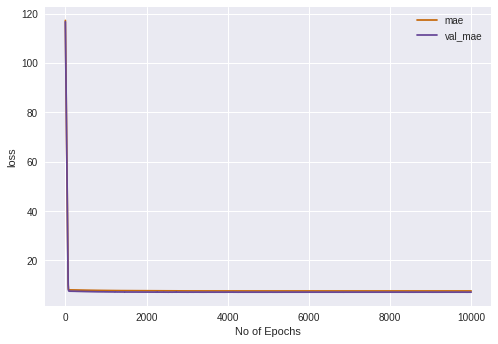

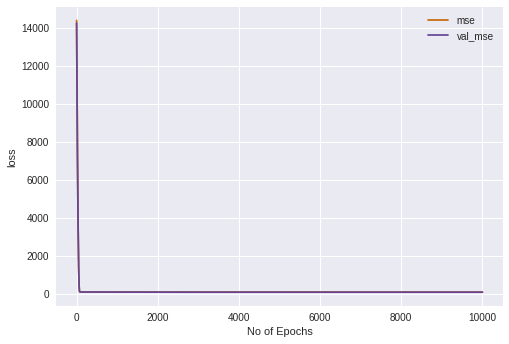

In [ ]:
def plotGraphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('No of Epochs')
  plt.ylabel('loss')
  plt.legend([string,f'val_{string}'])
  plt.show()

plotGraphs(history, 'loss')
plotGraphs(history, 'mae')
plotGraphs(history, 'mse')

In [ ]:
testPreds=model.predict(testFeatures).flatten()
print(testPreds)

[87.317696 85.72131  47.40818  45.8118   61.775604 55.390083 58.582848
 68.16113  71.35389  65.766556 75.34484  59.381035 60.977417 72.152084
 46.60999  50.600937 54.591896 55.390083 73.74846  76.143036 61.775604
 83.326744 61.775604 58.582848 82.52856  77.73942  56.18827  88.11589
 65.766556 80.932175 75.34484  56.18827  76.143036 49.004562 60.977417
 85.72131  73.74846  64.96837  62.5738   80.932175 75.34484  68.95932
 72.95027  78.537605 49.80275  56.986465 51.39913  64.96837  51.39913
 77.73942  74.54665  80.932175 61.775604 84.92313  82.52856  81.73036
 42.619034 60.179222 72.95027  67.36294  63.371986 78.537605 70.5557
 72.152084 70.5557   61.775604 81.73036  62.5738   57.784653 80.13399
 67.36294  72.152084 74.54665  73.74846  72.152084 75.34484  72.152084
 48.206367 64.17018  43.41723  61.775604 64.17018  76.94122  84.92313
 68.16113  62.5738   49.004562 79.33579  61.775604 83.326744 56.986465
 37.031704 52.19732  79.33579  72.152084 79.33579  84.92313  78.537605
 60.977417 67.

Prediction plot

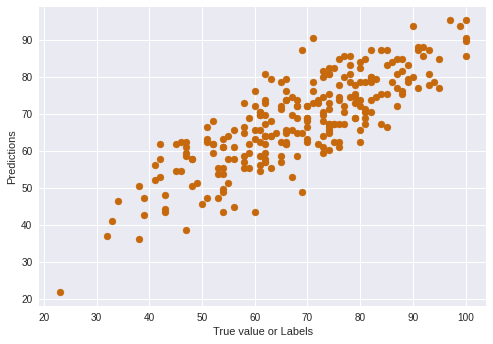

In [ ]:
def Predplot(labels,predictions):
  plt.scatter(labels,predictions)
  plt.xlabel('True value or Labels')
  plt.ylabel('Predictions')
  plt.show()

Predplot(testLabels,testPreds)

Error plot

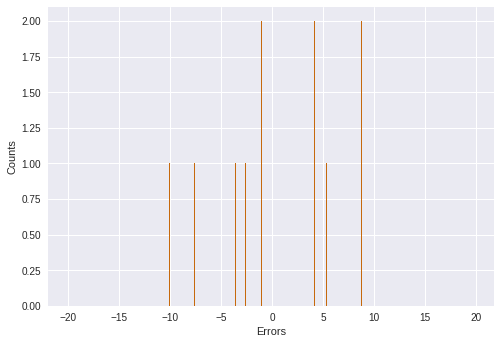

In [ ]:
def Errorplot(preds,labels,counts):
  errors=preds-labels
  plt.hist(errors,counts)
  plt.xlabel('Errors')
  plt.ylabel('Counts')
  plt.show()

Errorplot(testPreds,testLabels,numEpochs)